# Importing necessary libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Basic info on the Data

In [122]:
df = pd.read_csv("/Users/twmrgwzln/Downloads/corona_tested_individuals_ver_00225.csv")
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
9053443,2020-03-11,0,1,0,1,0,שלילי,NaN,NaN,Abroad
9053444,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053445,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053446,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


In [124]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other


### We will now change all the string data to int data:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1

In [164]:
df.drop(df[df['corona_result'] == "אחר"].index, inplace = True)

In [165]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6207383 entries, 0 to 9038856
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   test_date            object 
 1   cough                int64  
 2   fever                int64  
 3   sore_throat          int64  
 4   shortness_of_breath  int64  
 5   head_ache            int64  
 6   corona_result        int64  
 7   age_60_and_above     float64
 8   gender               float64
 9   test_indication      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 649.9+ MB


In [126]:
df[df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
count,908643.000000,908643.000000,908643.000000,908643.000000,908643.000000,873113.000000,854545.000000
mean,0.142531,0.121596,0.065954,0.017223,0.127806,0.127039,0.483181
std,0.349594,0.326818,0.248203,0.130103,0.333874,0.333016,0.499717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
count,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,6.109333e+06,6.485047e+06
mean,3.526871e-02,2.565342e-02,1.340597e-02,2.387500e-03,2.584274e-02,1.333741e-01,4.829492e-01
std,1.844582e-01,1.580991e-01,1.150055e-01,4.880369e-02,1.586660e-01,3.399787e-01,4.997092e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [128]:
df['gender'].value_counts()

0.0    3794744
1.0    3544848
Name: gender, dtype: int64

### Now we will clean all the NaN Data

In [129]:
df.isnull().sum()
df = df.dropna()

In [130]:
df.shape

(6207383, 10)

After we cleaned around 3 milions row of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [131]:

sample_df = df.sample(int(len(df) * 0.002))
sample_df.shape


(12414, 10)

In [170]:
sample_df.drop(sample_df[sample_df['corona_result'] == "אחר"].index, inplace = True)




In [171]:
sample_df['gender'] = sample_df['gender'].replace({"זכר": 1, "נקבה": 0})
sample_df['corona_result'] = sample_df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
sample_df['age_60_and_above'] = sample_df['age_60_and_above'].replace({"Yes": 1, "No": 0})

In [172]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 6950375 to 7583963
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### info about the sample data

In [133]:
sample_df['gender'].value_counts()

0.0    6444
1.0    5970
Name: gender, dtype: int64

In [134]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [135]:
Distribution_sample={'colums':['cough',
        'fever',
        'sore_throat',
        'shortness_of_breath',
        'head_ache',
        'corona_result',
        'age_60_and_above'],'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,589
1,fever,500
2,sore_throat,265
3,shortness_of_breath,49
4,head_ache,501
5,corona_result,1661
6,age_60_and_above,1637


In [136]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [137]:
Distribution_orginal={'colums':['cough',
        'fever',
        'sore_throat',
        'shortness_of_breath',
        'head_ache',
        'corona_result',
        'age_60_and_above'],'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,312000
1,fever,242341
2,sore_throat,132744
3,shortness_of_breath,26675
4,head_ache,258328
5,corona_result,826347
6,age_60_and_above,809527


Text(0.5, 1.0, 'Distribution_sample')

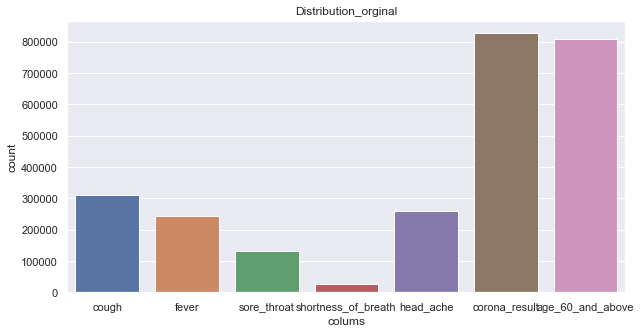

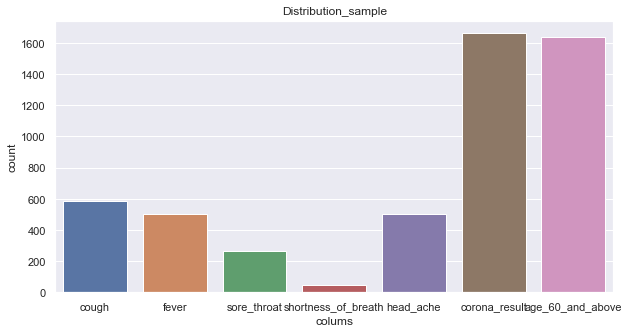

In [138]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

In [139]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,0.122818,0.116797,0.069235,0.013245,0.119205,0.136063,0.476821
std,0.328327,0.321275,0.253930,0.114357,0.324128,0.342958,0.499613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
6950375,2020-09-27,0,0,0,0,0,0,0.0,0.0,Other
5346015,2020-12-27,0,0,0,0,0,0,0.0,1.0,Other
2931647,2021-07-15,0,0,0,0,0,0,0.0,1.0,Other
3696943,2021-03-24,0,0,0,0,0,0,0.0,0.0,Other
5446985,2020-12-23,0,0,0,0,0,1,1.0,0.0,Other


In [154]:
sample_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 6950375 to 7583963
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  object 
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.3+ MB


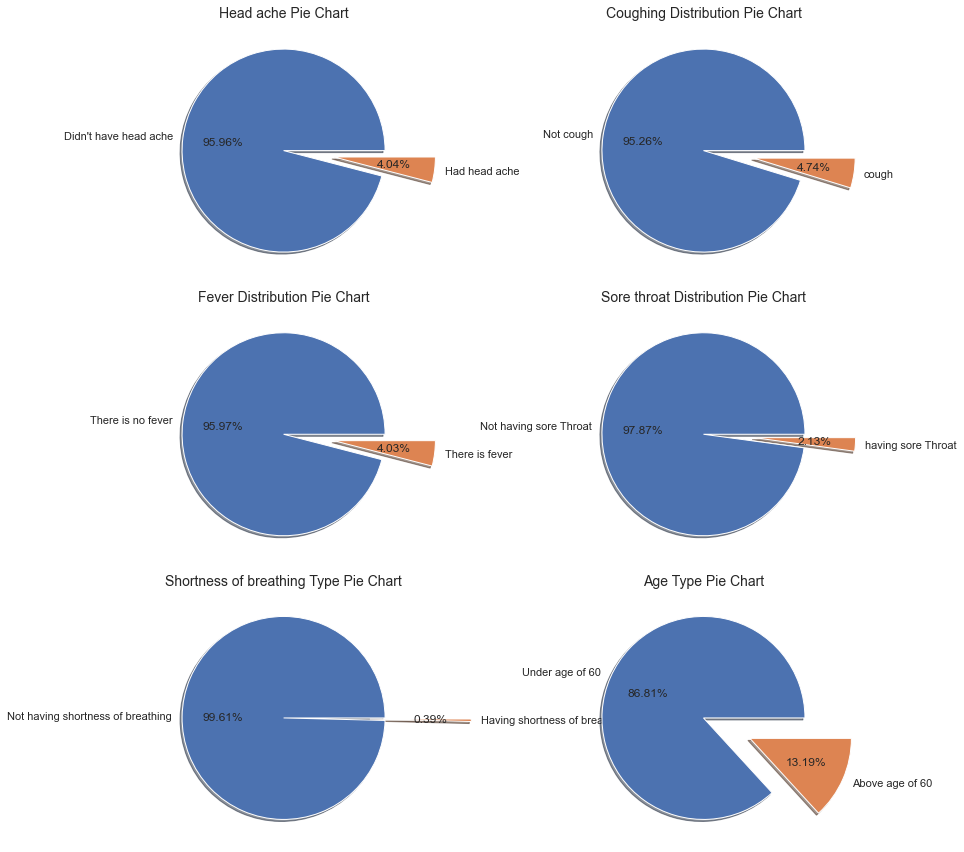

In [142]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6))  = ax
labels = ["Didn't have head ache", "Had head ache"]
values = sample_df['head_ache'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax1.set_title("Head ache Pie Chart", fontdict={'fontsize': 14})

labels = ["Not cough", "cough"]
values = sample_df['cough'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax2.set_title("Coughing Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["There is no fever", "There is fever"]
values = sample_df['fever'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax3.set_title("Fever Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not having sore Throat", "having sore Throat"]
values = sample_df['sore_throat'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax4.set_title("Sore throat Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not having shortness of breathing", "Having shortness of breathing"]
values = sample_df['shortness_of_breath'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.85])
ax5.set_title("Shortness of breathing Type Pie Chart", fontdict={'fontsize': 14})


labels = ["Under age of 60", "Above age of 60"]
values = sample_df['age_60_and_above'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax6.set_title("Age Type Pie Chart", fontdict={'fontsize': 14})



plt.tight_layout()
plt.show()

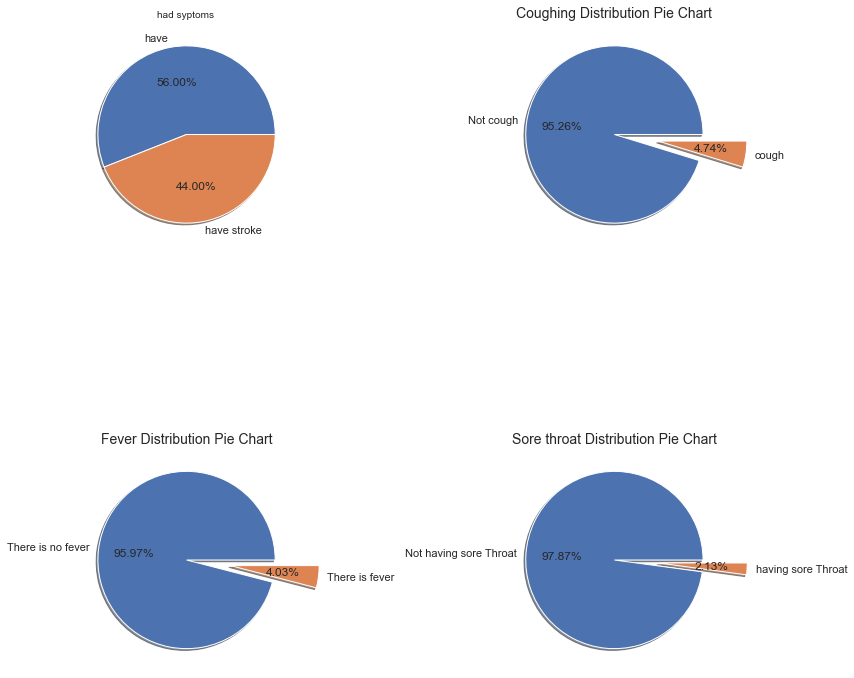

In [143]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["have", "have stroke"]
values = sample_df[(sample_df['sore_throat']==1) & (sample_df['cough']==1) & (sample_df['fever']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("had syptoms ", fontdict={'fontsize': 10})

labels = ["Not cough", "cough"]
values = sample_df['cough'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax2.set_title("Coughing Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["There is no fever", "There is fever"]
values = sample_df['fever'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax3.set_title("Fever Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not having sore Throat", "having sore Throat"]
values = sample_df['sore_throat'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax4.set_title("Sore throat Distribution Pie Chart", fontdict={'fontsize': 14})



plt.tight_layout()
plt.show()

# Corolation

In [177]:
sample_df.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
cough,1.000000,0.347440,0.294734,0.112855,0.306582,0.139341,0.053005,-0.027495
fever,0.347440,1.000000,0.250378,0.091654,0.318165,0.152965,0.015823,-0.015133
sore_throat,0.294734,0.250378,1.000000,0.124029,0.320877,0.130218,0.044565,-0.037302
shortness_of_breath,0.112855,0.091654,0.124029,1.000000,0.091540,0.058280,0.002045,-0.014308
head_ache,0.306582,0.318165,0.320877,0.091540,1.000000,0.157468,0.005970,-0.040090
corona_result,0.139341,0.152965,0.130218,0.058280,0.157468,1.000000,0.004873,-0.003215
age_60_and_above,0.053005,0.015823,0.044565,0.002045,0.005970,0.004873,1.000000,-0.023944
gender,-0.027495,-0.015133,-0.037302,-0.014308,-0.040090,-0.003215,-0.023944,1.000000


<AxesSubplot:>

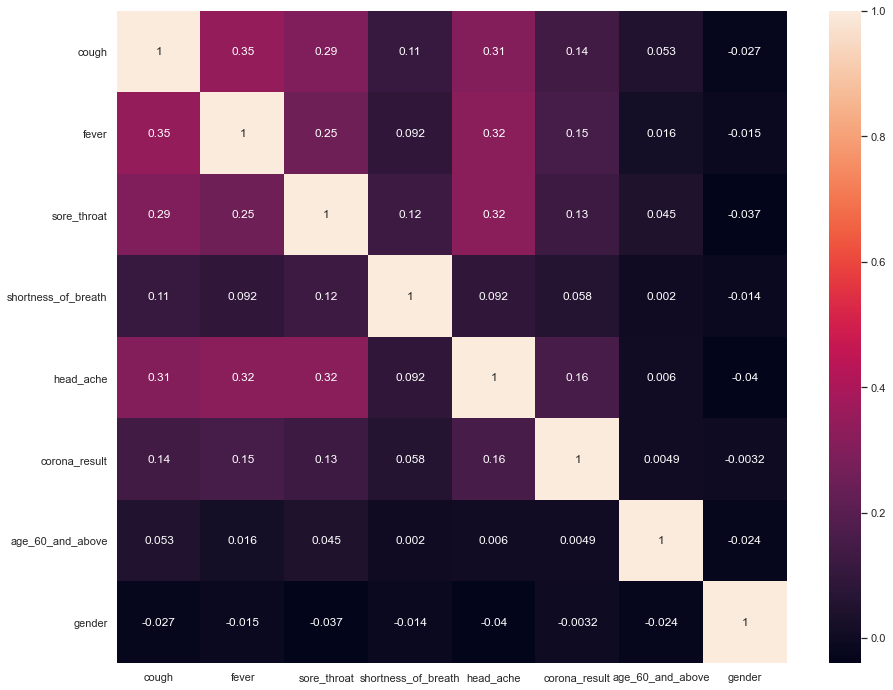

In [176]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(sample_df[['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache','corona_result','age_60_and_above', 'gender']].corr(),annot=True)